## KNN
- 유유상종 : 끼리끼리 모임
- K Nearest Neighbors
- K개의 가장 가까이 존재하는 데이터를  
기준으로 결과를 정하는 알고리즘
- 데이터와 데이터의 거리를 도출 후 거리 순으로 정렬
- K개 만큼 가까이 있는 데이터를 도출
> - 분류: 다수결원칙으로 많은 종류의 데이터로 결론 도출
> - 회귀: 데이터의 평균값으로 결과를 도출
- 특징
> - 데이터의 규칙/패털을 나타내는 수식이 없음 
> - 데이터를 메모리 모두 저장 후 거리를 측정해서 결과 도출 (Lazy 학습) 

## scikit-learn 패키지
기계학습 방법  
1. 학습 모델 인스턴스 생성
2. fit 메서드 사용하여 데이터 학습
> fit(2D, 1D(라벨))
3. score 에서드 사용하여 학습 테스트
> score(2D, 1D(라벨))
4. 활용 메서드 => predict(2D) ----> 결과


### 목표 : 생성 품중 분류 모델
- 데이터 : 2가지 품종의 생선 데이터로 fish.csv
- Feature : Weight, Length
- Target : Species
- 유형 : 지도학습 / 분류

#### 모듈 준비 & 데이터 준비

In [323]:

from sklearnex import patch_sklearn, unpatch_sklearn
patch_sklearn()
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [324]:
# 5개의 피쳐/특성 중 2개의 피쳐/특성 선택
df = pd.read_csv("../data/fish.csv", usecols=["Weight", "Length", "Species"])
df.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [325]:
df['Species'] = df['Species'].astype('category')
mask = df['Species'].isin(['Bream', 'Smelt'])
fishDF = df[mask].copy()
fishDF.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [326]:
fishDF.reset_index(drop=True, inplace=True)
fishDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


#### 데이터 전처리


Text(0.5, 1.0, 'Fish Weight vs Length')

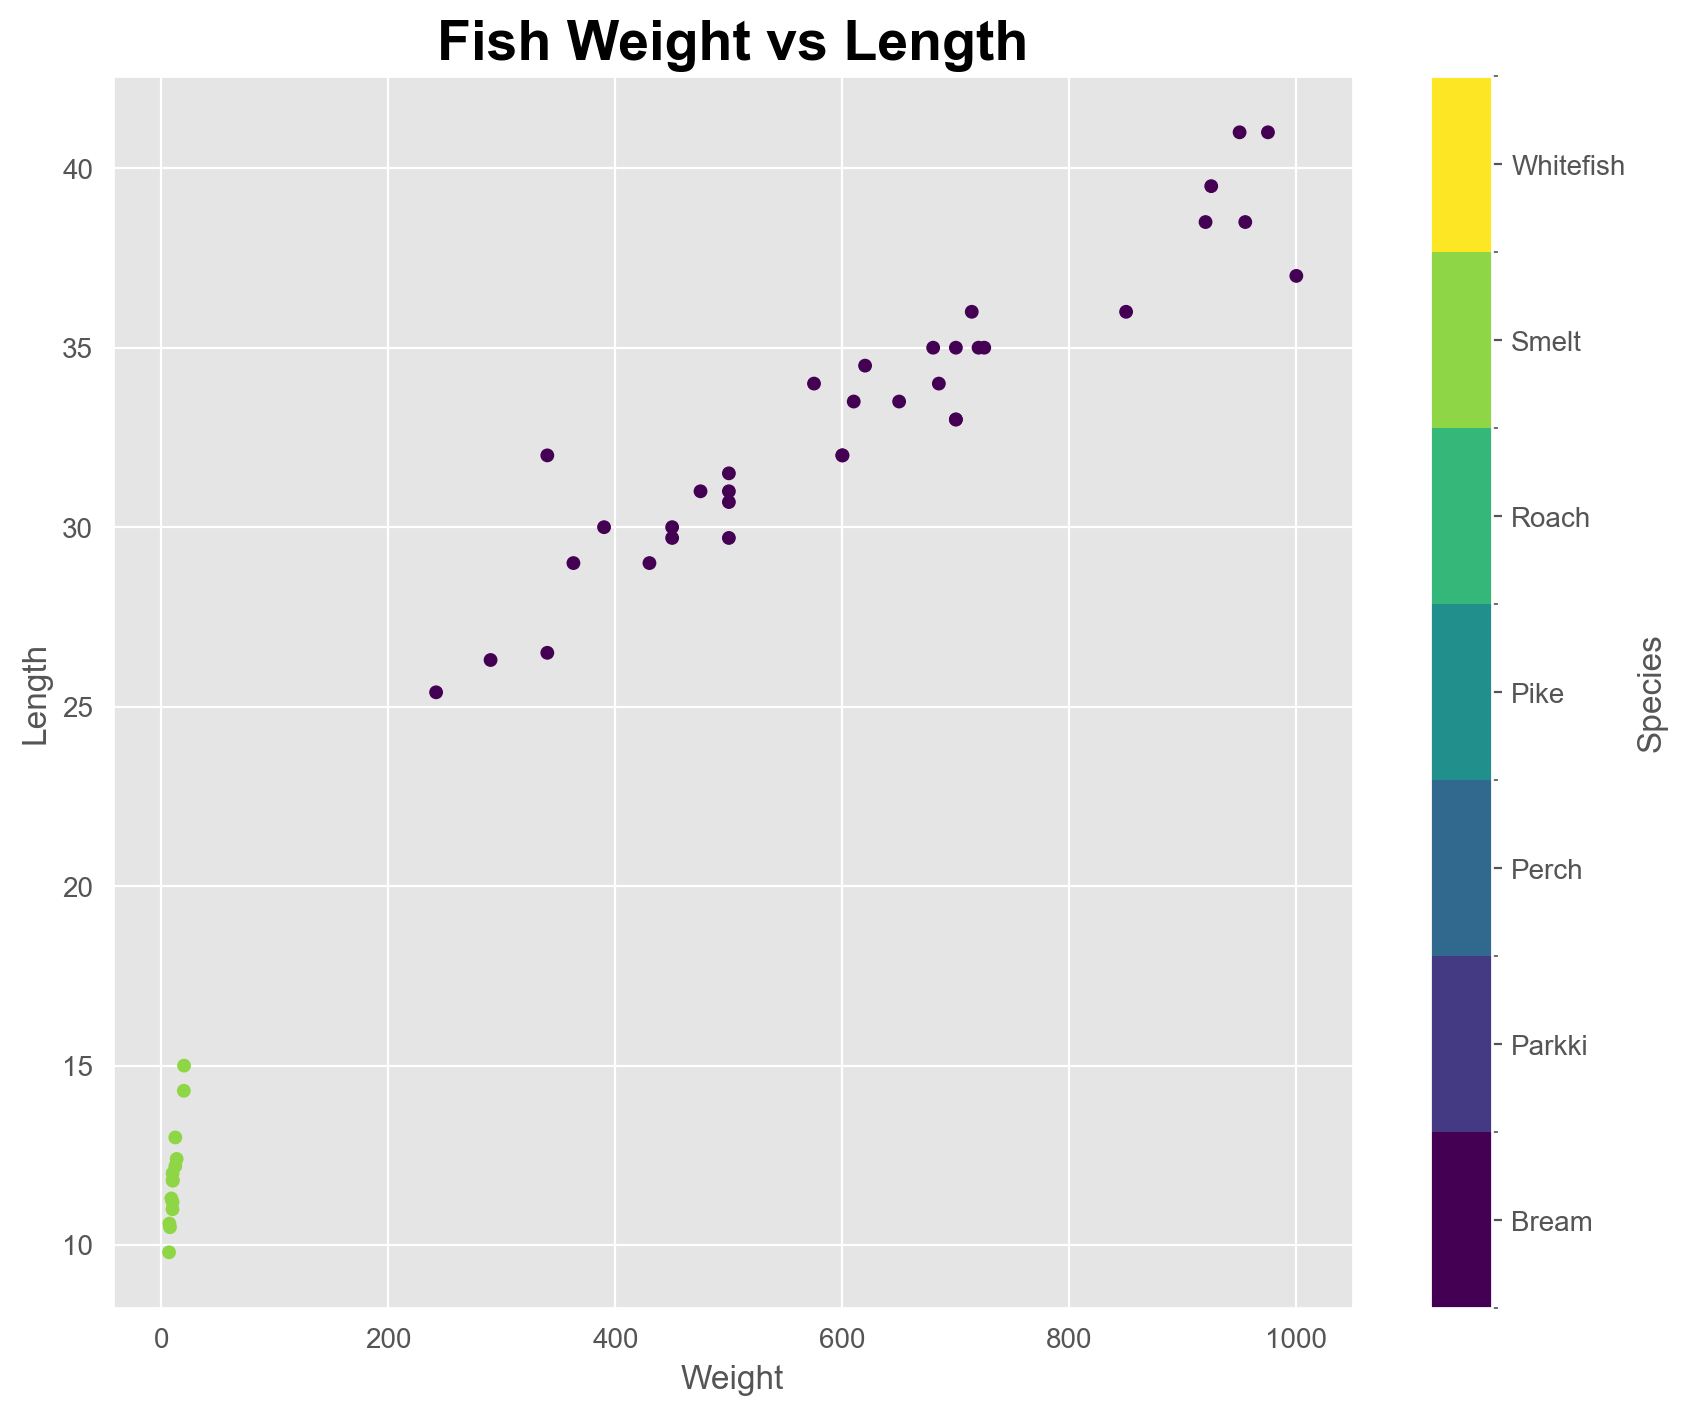

In [327]:
# Weight, Length로 품종 구별이 가능한지 시각화 확인 
# change
import matplotlib as mpl

# change theme in mpl
mpl.style.use('ggplot')
plt.figure(figsize=(8, 6), dpi=200)
ax = plt.subplot(111)
# use colormap
fishDF.plot(kind='scatter', c = 'Species', x = 'Weight', y='Length', figsize=(10, 8), cmap='viridis', ax = ax)
plt.title('Fish Weight vs Length', fontsize=20, color='black', weight='bold')

#### 기계학습을 위한 데이터 준비
- 피쳐/특성 + 타겟/라벨/클래스
- 학습용 데이터셋      : 80%
- 테스트용 데이터셋     : 20%


##### 직접 타켈/라벨 컬럼의 비율을 고려해서 학습&테스트용 데이터셋 준비

In [328]:
fishDF.sample(frac=1.0)

,Species,Weight,Length
19,Bream,650.0,33.5
32,Bream,925.0,39.5
10,Bream,475.0,31.0
44,Smelt,12.2,12.2
31,Bream,955.0,38.5
36,Smelt,7.5,10.5
29,Bream,1000.0,37.0
41,Smelt,10.0,11.8
1,Bream,290.0,26.3
23,Bream,680.0,35.0


##### scikit-learn 모듈을 활용한 학습&테스트용 데이터셋 준비
- 추가 모듈 로딩


In [329]:
from sklearn.model_selection import train_test_split
## 비율 설정 없이 학습/테스트셋 분리
## [기본] shuffle=True, train:test, 3:1
## [반환] 학습용 피쳐, 테스트용 피쳐, 학습용 타켓, 테스트용 타겟


In [330]:
fishDF[fishDF.columns[0]].head()
fishDF.Species = fishDF.Species.cat.codes

In [331]:
from sklearn.model_selection import train_test_split
## 비율 설정 없이 학습/테스트셋 분리
## [기본] shuffle=True, train:test, 3:1
## [반환] 학습용 피쳐, 테스트용 피쳐, 학습용 타켓, 테스트용 타겟
##       분류의 경우 target이 불균형일 경우 비율 정하는 stratify 매개변수 설정
## 분류를 통한 기계학습의 경우 stratify 를 통해 비율을 맞춰주도록 해야함

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    fishDF[fishDF.columns[1:]], 
    fishDF[fishDF.columns[0]], 
    test_size=0.1, 
    random_state=123, 
    stratify=fishDF[fishDF.columns[0]],
)


In [332]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train,
    test_size=0.25,
    random_state=123,
    stratify=y_train
)

#### 학습진행
- 학습 방법 : 지도학습 / 분류 ==> KNN
- 모델 인스턴스 생성 => fit()

In [333]:


# x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
#     fishDF[fishDF.columns[1:]], 
#     fishDF[fishDF.columns[0]], 
#     test_size=0.2, 
#     random_state=123, 
# )

knn = sklearn.neighbors.KNeighborsClassifier(
    n_neighbors=5, 
    weights='distance', 
    p=2, 
    metric='minkowski' , 
    n_jobs=-1,
)

knn.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, weights='distance')

#### 테스트 진행 => 학습에 사용되지 않는 데이터로 진행

In [334]:
knn.score(x_val, y_val)

1.0

#### 모델 활용 예측 => 학습에 사용되지 않는 데이터로 진행

In [335]:
knn.predict(x_test) == y_test

19    True
2     True
44    True
28    True
17    True
Name: Species, dtype: bool

#### 사용자로부터 전달받은 새로운 데이터에 대한 예측
--> 학습할 떄 전달되는 피쳐형태와 동일한 데이터


In [348]:
new_data = pd.DataFrame([[250,25]], columns=fishDF.columns[1:])
new_data

,Weight,Length
0,250,25


In [349]:
knn.predict(new_data)


array([0], dtype=int8)

In [350]:
# 새로운 데이터와 학습 데이터의 시각화
result = knn.kneighbors(new_data)
result

(array([[  8.00999376,  40.02111942,  90.27181177, 113.0707743 ,
         140.08925726]]),
 array([[ 5,  8, 31, 27, 25]]))

In [351]:
resultDF = x_train[x_train.index.isin(result[1][0])]
resultDF

,Weight,Length
27,7.0,10.6
31,714.0,36.0
25,430.0,29.0
8,9.9,11.8
5,475.0,31.0


In [352]:
fishDF[fishDF['Species'] == 5]

,Species,Weight,Length
35,5,6.7,9.8
36,5,7.5,10.5
37,5,7.0,10.6
38,5,9.7,11.0
39,5,9.8,11.2
40,5,8.7,11.3
41,5,10.0,11.8
42,5,9.9,11.8
43,5,9.8,12.0
44,5,12.2,12.2


Text(0, 0.5, 'Length')

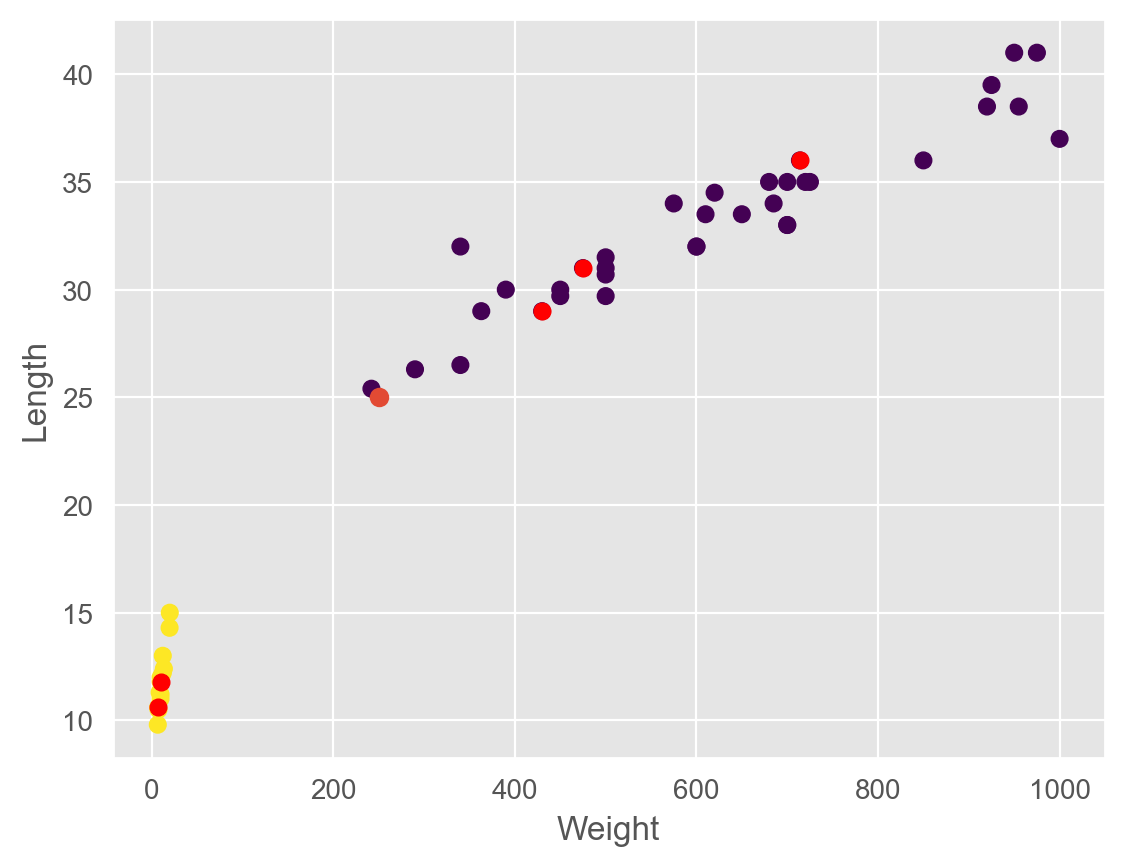

In [353]:



plt.figure(dpi=200)
plt.plot(new_data.Weight, new_data.Length, 'o', label='new')

plt.scatter(fishDF.Weight, fishDF.Length, c=fishDF.Species, cmap='viridis', label='train')
plt.scatter(resultDF.Weight, resultDF.Length, c='red', label='neighbor')
plt.xlabel('Weight')
plt.ylabel('Length')

